**FGV EPGE - Escola de Pós-graduação em Economia**
==
**Trabalho da Disciplina Deep Learning**
==

Professores: 


Monitora: 

Alunas: 

**Amazon Fine Food Reviews**

Analyze ~500,000 food reviews from Amazon.

## Based on **CRISP-DM**

The CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process. It has six sequential phases:

- 1. Business understanding – What does the business need?
- 2. Data understanding – What data do we have / need? Is it clean?
- 3. Data preparation – How do we organize the data for modeling?
- 4. Modeling – What modeling techniques should we apply?
- 5. Evaluation – Which model best meets the business objectives?
- 6. Deployment – How do stakeholders access the results?

In [40]:
## libraries
import time
start_time = time.time()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime
import os.path
import sys
import gc

# release memory RAM
def release_memory(df):   
    del df
    gc.collect() 
    df = pd.DataFrame() # point to NULL
    print('memory RAM released.')

# release memory for large arrays (dictionary)
def release_array(dd):
    del dd 
    gc.collect()
    dd = None

In [41]:
# Reduce DataFrame size
# This part of the code is not my, I get from this webpage: 
# https://www.mikulskibartosz.name/how-to-reduce-memory-usage-in-pandas/
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
    if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)                    
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [42]:
import requests as re
import re # for regex
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
#nltk.download('all')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score
import pickle
from transformers import BertTokenizer, BertForSequenceClassification
from nltk.tokenize import word_tokenize
import string
from collections import Counter
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing import sequence
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping


[nltk_data] Downloading package wordnet to /home/andsilva/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE

In [44]:
now = datetime.now()
 
print("date..............:", now)

date..............: 2023-05-21 17:05:26.800204


### 1. Business understanding – What does the business need?

Compreender o contexto de negócios para a análise de sentimentos em avaliações de alimentos da Amazon é fundamental para identificar como essa análise pode ser aplicada de maneira relevante. Para a compreensão do negócio para a análise de sentimentos nessas avaliações:

1. **Descrição do problema**:
   A Amazon é uma das maiores varejistas online do mundo e possui uma vasta variedade de produtos disponíveis, incluindo alimentos. Os clientes têm a oportunidade de deixar avaliações e comentários sobre esses produtos, o que pode influenciar as decisões de compra de outros consumidores.

   A análise de sentimentos em avaliações de alimentos da Amazon visa extrair informações valiosas dessas avaliações, identificando a polaridade (positiva, negativa ou neutra) dos sentimentos expressos pelos clientes. Isso permite que a Amazon entenda melhor a satisfação do cliente em relação a um determinado produto e tome medidas adequadas para melhorar a experiência do cliente e a qualidade dos produtos oferecidos.

2. **Objetivos do negócio**:
   - Compreender a satisfação do cliente: A análise de sentimentos ajuda a determinar se os clientes estão satisfeitos ou insatisfeitos com os alimentos adquiridos na Amazon. Isso permite à empresa ter uma visão geral da percepção dos clientes em relação aos produtos oferecidos e identificar possíveis problemas ou áreas de melhoria.

   - Tomar decisões de negócios informadas: Ao analisar os sentimentos expressos nas avaliações, a Amazon pode identificar padrões e tendências que ajudam a tomar decisões informadas sobre quais produtos devem ser promovidos, quais necessitam de melhorias ou quais devem ser descontinuados.

   - Personalização da experiência do cliente: Com base na análise de sentimentos, a Amazon pode fornecer recomendações personalizadas aos clientes, levando em consideração suas preferências e opiniões expressas em avaliações anteriores. Isso melhora a experiência de compra do cliente e aumenta a fidelidade à marca.

3. **Fonte de dados**:
   A fonte de dados para a análise de sentimentos são as avaliações dos clientes sobre alimentos da Amazon. Esses dados podem incluir informações como texto da avaliação, classificação (por exemplo, de 1 a 5 estrelas), data da avaliação e informações do cliente (por exemplo, nome, localização, histórico de compras).

   Essas avaliações podem ser coletadas por meio da API pública da Amazon ou por meio de um conjunto de dados já disponível contendo avaliações históricas.

4. **Métricas de avaliação**:
   As métricas comuns para avaliar a eficácia da análise de sentimentos em avaliações de alimentos podem incluir:
   - Acurácia: percentual de avaliações classificadas corretamente em termos de sentimento (positivo, negativo ou neutro).
   - Precisão e revocação: medidas que indicam a proporção de avaliações positivas/negativas corretamente identificadas em relação ao total de avaliações positivas/negativas presentes nos dados.

   Outras métricas podem ser usadas, dependendo dos objetivos específicos do negócio.

In [45]:
## https://www.datascience-pm.com/crisp-dm-2/

#### https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
df_reviews = pd.read_csv('../dataset/Reviews.csv') # full dataset

# reduce memory usage
df_reviews = reduce_mem_usage(df_reviews)

# dataset size:
print(f'Numero de linhas: {df_reviews.shape[0]}, numero de colunas: {df_reviews.shape[1]}') 

Memory usage of dataframe is 43.37 MB
Memory usage after optimization is: 43.37 MB
Decreased by 0.0%
Numero de linhas: 568454, numero de colunas: 10


### 2. Data understanding – What data do we have / need? Is it clean?

- Explorar os dados:
  - Carregue o conjunto de dados em Python e examine sua estrutura e conteúdo.
  - Verifique as diferentes colunas presentes nos dados, como o texto do comentário, a classificação (positiva ou negativa) ou outras informações relevantes.

In [46]:
######## parte do dataset
df_reviews_copy = df_reviews.copy()
df_reviews_sample = df_reviews_copy.sample(50) # FIXME remover no final

# release memory RAM - dataframe
release_memory(df_reviews_copy)
release_memory(df_reviews)
df_reviews = df_reviews_sample[['Score', 'Text']] # select o
release_memory(df_reviews_sample)

memory RAM released.
memory RAM released.
memory RAM released.


### Data preparation – How do we organize the data for modeling?

In [47]:
# Lista de valores faltantes
df_reviews.isna().sum()

Score    0
Text     0
dtype: int64

In [48]:
# dataset - tamanho
df_reviews.shape

(50, 2)

In [49]:
# retirar linha com valores faltantes
df_reviews = df_reviews.dropna()

In [50]:
# checar numero de linha faltantes
df_reviews.isna().sum()

Score    0
Text     0
dtype: int64

In [51]:
df_reviews.shape

(50, 2)

In [52]:
# retirar os neutros.
df_reviews = df_reviews[df_reviews['Score'] != 3]

In [53]:
df_reviews.head(3)

,Score,Text
277483,5,"these pop chips rock, better than baked or fri..."
399205,5,The results we have had since we switched to N...
110543,5,SO after hearing from some friends about how g...


In [54]:
# lista a quantidade de cada categoria de score.
df_reviews['Score'].value_counts()

5    36
4     8
2     2
1     1
Name: Score, dtype: int64

In [55]:
# redefinir score
def sentiment(label):
    if label == 5.0 or label == 4.0:
        return "0"
    #elif label == 3.0:
    #    return "Neutral"
    elif label == 1.0 or label == 2.0:
        return "1"
df_reviews['negative'] = df_reviews["Score"].apply(sentiment)

In [56]:
df_reviews["negative"].value_counts()

0    44
1     3
Name: negative, dtype: int64

In [57]:
#Mude df5 para df3 para pegar toda base
texts = df_reviews['Text'].sum()
texts[0:1000]

"these pop chips rock, better than baked or fried.Crunchy,salty,100 cal. who could ask for more? I usually buy a box of 24 a month. Definitely worth it. Weight watchers- 2 pts.These are my favorite snacks.The results we have had since we switched to Newman's Own Pet food are phenomenal. All of our pets look and act younger, their coats are shiny, their noses are wet, and they have a bounce to their step. All natural and healthy ingredients seem to suit them as well, before Newman's many of our pets where picky eaters. Now we have no trouble making sure they get their daily quota of healthy food.SO after hearing from some friends about how gross instant brew coffee was I was pretty scared to ever try any, but then I was lazy one day and bought some VIA. This stuff tastes great to me. I add french vanilla creamer and some sugar and call it a day, tastes like some good coffee to me =)Love these organic pouch foods because of the convenience (way lighter than jar food) and the interesting 

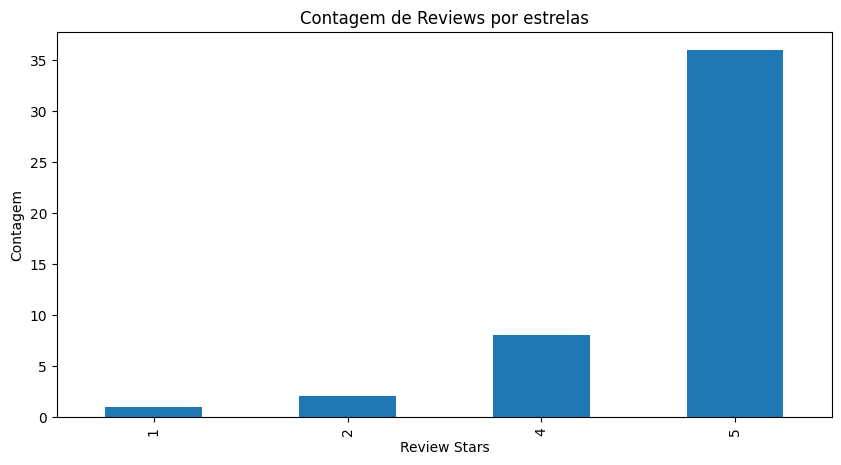

In [58]:
ax = df_reviews['Score'].value_counts().sort_index().plot(kind='bar',
                                                  title='Contagem de Reviews por estrelas',
                                                  figsize=(10, 5)
                                                 )

ax.set_xlabel('Review Stars')
ax.set_ylabel('Contagem')
plt.show()

In [59]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords_pa = stop_en + stop_pt
stopwords_pa.extend(['-',''])

In [60]:
list_words = texts.split()
list_words = [l.strip().lower() for l in list_words]


In [61]:
# lista de palavras do Text 'reviews'
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords_pa]
freqdist = Counter(list_words)
dict(freqdist.most_common(10))

{'tea': 25,
 'br': 22,
 'like': 20,
 'flavor': 20,
 'one': 13,
 'good': 13,
 'product': 12,
 'energy': 11,
 'food': 10,
 'coffee': 10}

In [62]:
from wordcloud import WordCloud
cleaned = ' '.join(list_words)
wordcloud = WordCloud().generate(cleaned)

### Nuvem de Palavras

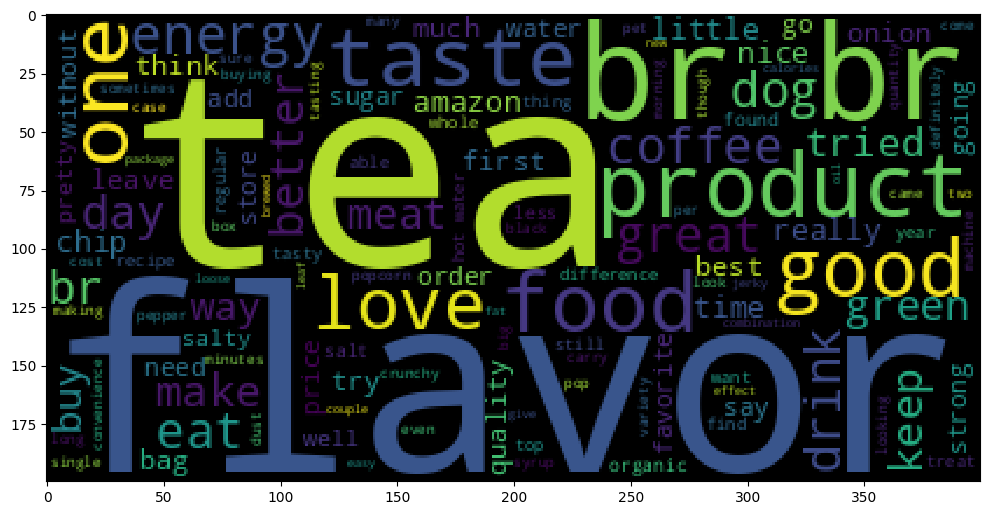

In [63]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.grid(False)
plt.tight_layout()

In [64]:
freq_common_works = dict(freqdist.most_common(10))
freq_common_works

{'tea': 25,
 'br': 22,
 'like': 20,
 'flavor': 20,
 'one': 13,
 'good': 13,
 'product': 12,
 'energy': 11,
 'food': 10,
 'coffee': 10}

In [65]:
common_words = list(freq_common_works.keys())
common_words = common_words[0:4]

In [66]:
dispersion_words = common_words
plt.figure(figsize=(16,6))
#nltk_text.dispersion_plot(dispersion_words)

<Figure size 1600x600 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

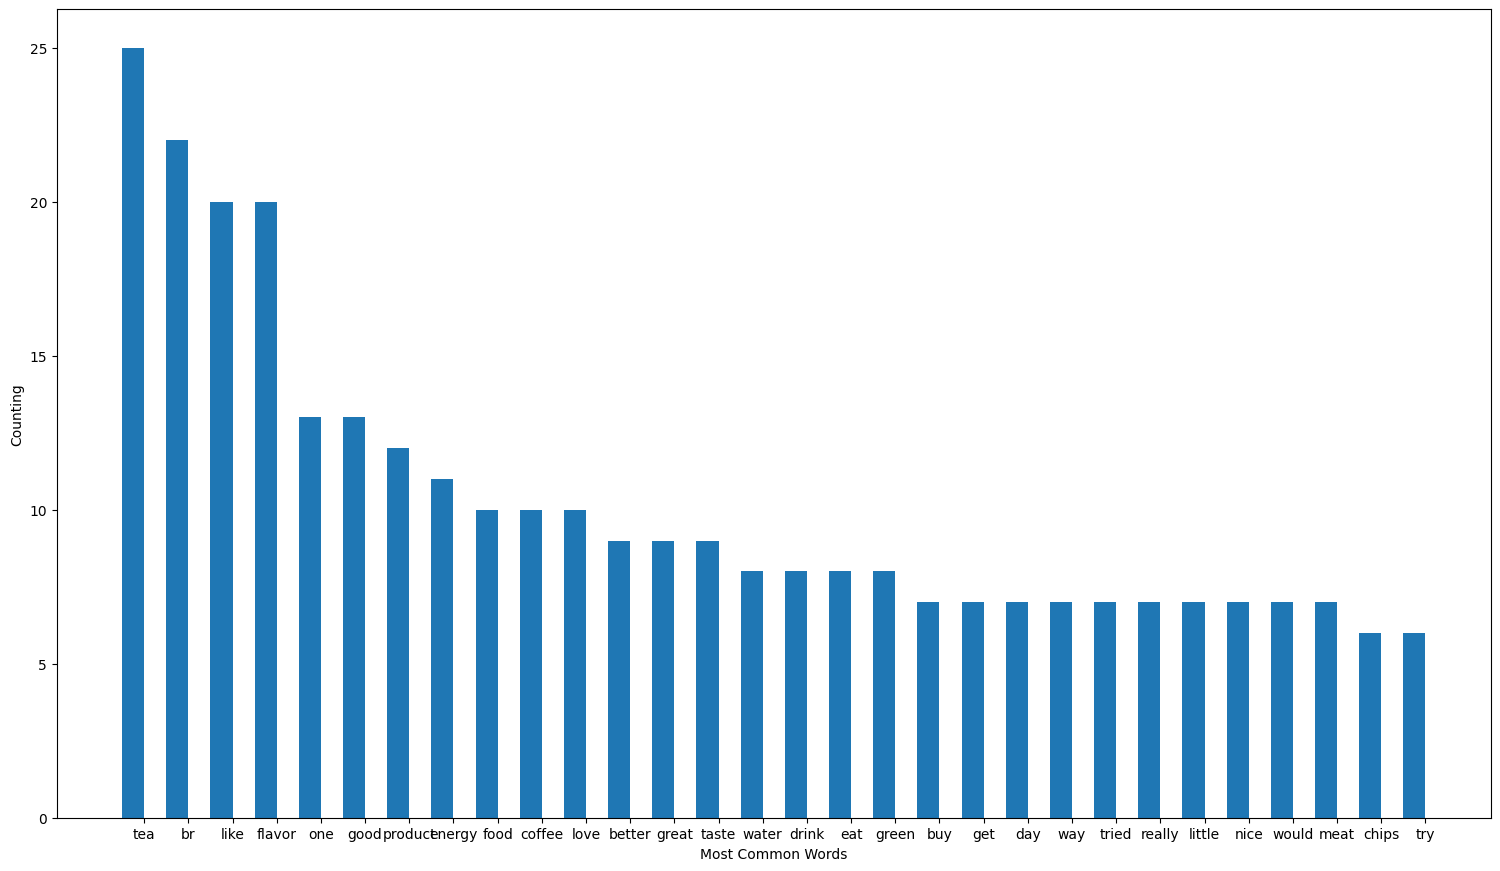

In [67]:
labels, values = zip(*freqdist.most_common(30))

indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.xticks(indexes + width * 0.5, labels)
plt.xlabel('Most Common Words') 
plt.ylabel('Counting') 
plt.show()

In [68]:
# remove tags html
# cleaning
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)

df_reviews['Text'] = df_reviews['Text'].apply(clean)

In [69]:
# remover caracteres especiais
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem

df_reviews['Text'] = df_reviews['Text'].apply(is_special)

In [70]:
# Converter - lowercase
def to_lower(text):
    return text.lower()

df_reviews['Text'] = df_reviews['Text'].apply(to_lower)

In [71]:
nltk.download('stopwords')
nltk.download('punkt')

def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df_reviews['Text'] = df_reviews['Text'].apply(rem_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/andsilva/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [72]:
#No review tenha palavras de outro idioma
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

df_reviews['Text'] = df_reviews['Text'].apply(stem_txt)
#df_reviews['Text']

In [73]:
df_reviews.columns

Index(['Score', 'Text', 'negative'], dtype='object')

In [74]:
# converter string para inteiro
df_reviews['negative'] = pd.to_numeric(df_reviews['negative'])

In [75]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 277483 to 472314
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Score     47 non-null     int64 
 1   Text      47 non-null     object
 2   negative  47 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ KB


In [76]:
df_reviews['Text']

277483    pop chip rock better bake fri crunchi salti 10...
399205    result sinc switch newman pet food phenomen pe...
110543    hear friend gross instant brew coffe pretti sc...
125945    love organ pouch food conveni way lighter jar ...
458863    make popcorn tast like local theater popcorn s...
341573    tri flavor good howev absolut favorit salt pep...
63523     workplac coffe maker need coffe sometim can co...
508978    like tast textur howev one packag arriv vaccuu...
387692    dog get everi year christma birthday bought fi...
352189    breath saver spearmint best sugar free mint co...
29782     love tea hard find christma holiday season pro...
319027    time wish energi drink love way tast like drin...
111014    dog like much bark dish like well stew brand t...
231755            flavor thought would would buy disappoint
252440    order came time fashion plant better expect gr...
26955     love kid finish entir pot ad much recip quit s...
260830    stuff incred valu soda stream 

In [77]:
# create preprocess_text function
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())

    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]


    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

In [78]:
df_reviews['Text'] = df_reviews['Text'].apply(preprocess_text)
df_reviews['Text']

277483    pop chip rock better bake fri crunchi salti 10...
399205    result sinc switch newman pet food phenomen pe...
110543    hear friend gross instant brew coffe pretti sc...
125945    love organ pouch food conveni way lighter jar ...
458863    make popcorn tast like local theater popcorn s...
341573    tri flavor good howev absolut favorit salt pep...
63523     workplac coffe maker need coffe sometim coffe ...
508978    like tast textur howev one packag arriv vaccuu...
387692    dog get everi year christma birthday bought fi...
352189    breath saver spearmint best sugar free mint co...
29782     love tea hard find christma holiday season pro...
319027    time wish energi drink love way tast like drin...
111014    dog like much bark dish like well stew brand t...
231755            flavor thought would would buy disappoint
252440    order came time fashion plant better expect gr...
26955     love kid finish entir pot ad much recip quit s...
260830    stuff incred valu soda stream 

In [79]:
X = df_reviews['Text']
y = df_reviews['negative']

In [80]:
# release memory RAM
release_memory(df_reviews)

memory RAM released.


In [81]:
cv = CountVectorizer()
X = cv.fit_transform(X).toarray()
#word_freq = dict(zip(cv.get_feature_names_out(), np.asarray(bow.sum(axis=0)).ravel()))

smote = SMOTE()

# inbalance data to balance
X, y = smote.fit_resample(X, y)

print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6

In [ ]:
x_train, x_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# release memory - array
release_array(X)
release_array(y)

In [ ]:
#Criando funções para avaliação dos modelos
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.grid(False)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
def clf_eval(clf, X, y_true, classes=['Positivo', 'Negativo']):
    y_pred = clf.predict(X)
    clf_matrix = confusion_matrix(y_true, y_pred)
    print('Classification Report')
    print(classification_report(y_true, y_pred, target_names=classes))
    print('ROC Score: {}'.format(roc_auc_score(y_true, y_pred)))
    print('Accuracy Score: {}'.format(accuracy_score(y_true, y_pred)))
    print('Average Precision Score: {}'.format(average_precision_score(y_true, y_pred)))
    print('f1 Score: {}'.format(f1_score(y_true, y_pred)))
    plot_confusion_matrix(clf_matrix, classes=classes)
    return roc_auc_score(y_true, y_pred)

## Modeling – What modeling techniques should we apply?

### Machine Learning

#### Gaussian Naive Bayes (GaussianNB).

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = GaussianNB().fit(x_train, y_train)


### Evaluation – Which model best meets the business objectives?

Classification Report
              precision    recall  f1-score   support

    Positivo       1.00      0.79      0.88      3112
    Negativo       0.82      1.00      0.90      3084

    accuracy                           0.89      6196
   macro avg       0.91      0.89      0.89      6196
weighted avg       0.91      0.89      0.89      6196

ROC Score: 0.892512853470437
Accuracy Score: 0.8920271142672692
Average Precision Score: 0.8217426059152678
f1 Score: 0.9021500658183415
Confusion matrix, without normalization
[[2443  669]
 [   0 3084]]


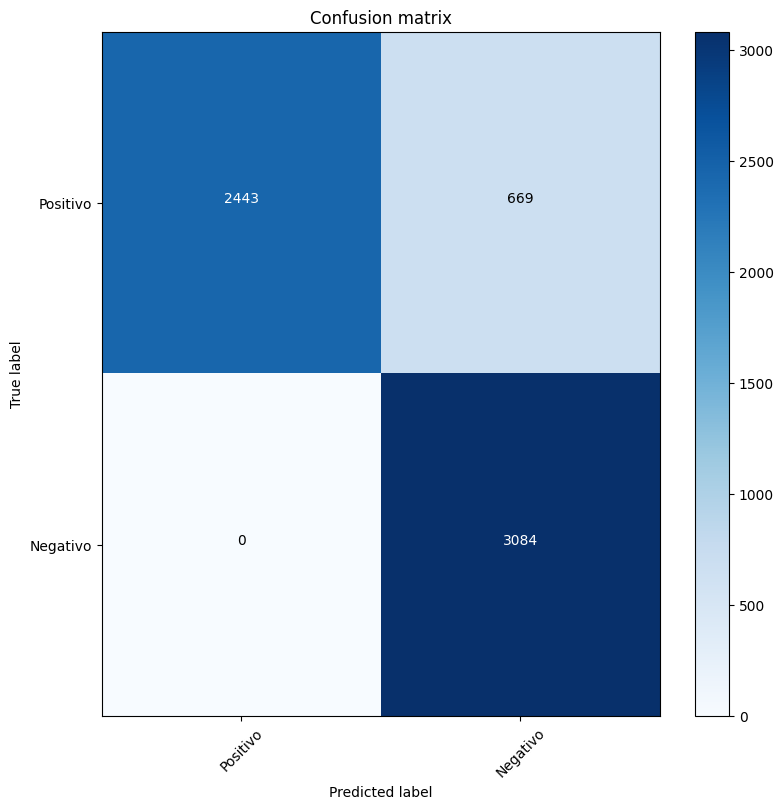

In [ ]:
roc_gnb = clf_eval(clf_gnb, x_train, y_train)

#### Naive Bayes classifier for multivariate Bernoulli model

In [ ]:
from sklearn.naive_bayes import BernoulliNB

clf_bnb = BernoulliNB(alpha=0.20, 
                     binarize=0.0, 
                     fit_prior=True, 
                     class_prior=None).fit(x_train, y_train)


### Evaluation – Which model best meets the business objectives?

Classification Report
              precision    recall  f1-score   support

    Positivo       0.88      0.74      0.80      3112
    Negativo       0.77      0.90      0.83      3084

    accuracy                           0.82      6196
   macro avg       0.83      0.82      0.82      6196
weighted avg       0.83      0.82      0.82      6196

ROC Score: 0.8199263801226331
Accuracy Score: 0.8195610071013557
Average Precision Score: 0.7464234330485352
f1 Score: 0.8324842673059635
Confusion matrix, without normalization
[[2300  812]
 [ 306 2778]]


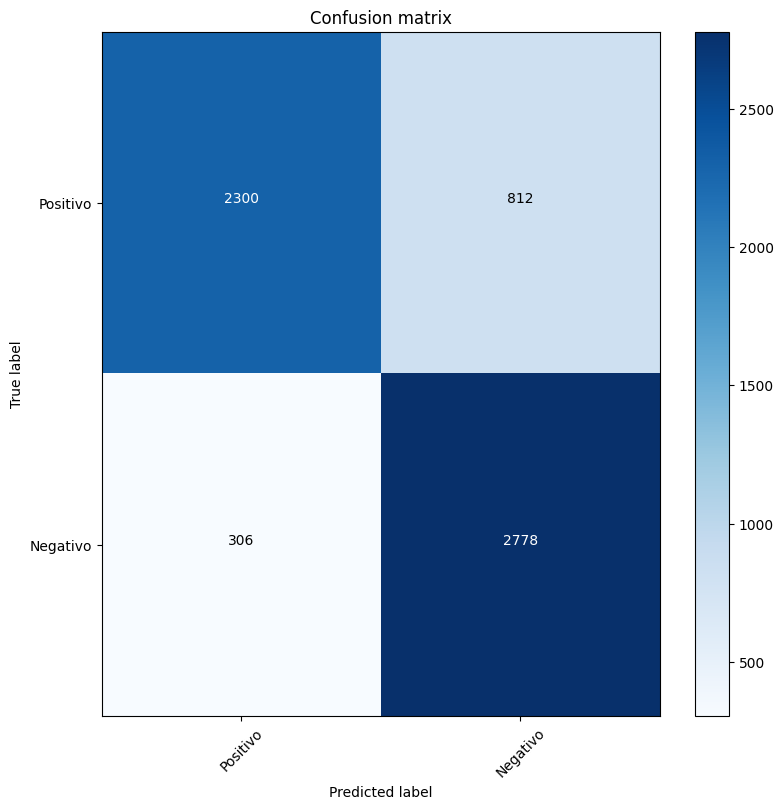

In [ ]:
roc_bnb = clf_eval(clf_bnb, x_train, y_train)

#### Gradient Boosting for classification.

In [ ]:
gb_clf = GradientBoostingClassifier()
gb_clf_sa =gb_clf.fit(x_train, y_train)
pred_train = gb_clf_sa.predict(x_train)

### Evaluation – Which model best meets the business objectives?

Classification Report
              precision    recall  f1-score   support

    Positivo       0.88      0.84      0.86       761
    Negativo       0.85      0.89      0.87       789

    accuracy                           0.87      1550
   macro avg       0.87      0.87      0.87      1550
weighted avg       0.87      0.87      0.87      1550

ROC Score: 0.8666103735828882
Accuracy Score: 0.8670967741935484
Average Precision Score: 0.8159141841542886
f1 Score: 0.8725247524752475
Confusion matrix, without normalization
[[639 122]
 [ 84 705]]


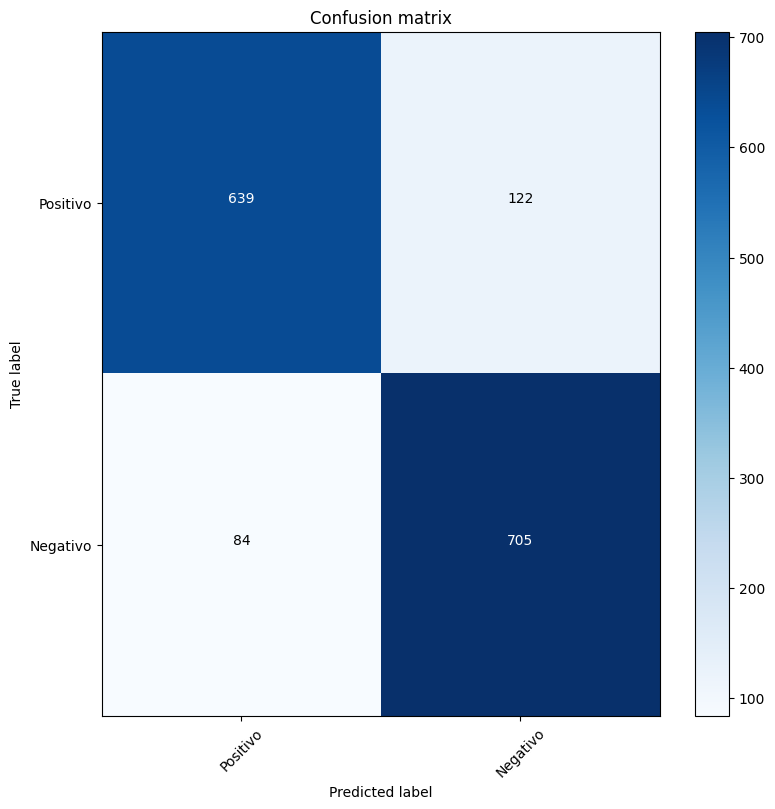

In [ ]:
roc_gb = clf_eval(gb_clf_sa, x_validation, y_validation)

#### Deep learning: Keras

In [ ]:
plt.style.use("seaborn-v0_8-whitegrid")
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [ ]:
model = keras.Sequential([layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='relu'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1024, activation='sigmoid'),
                          layers.Dropout(0.3),
                          layers.BatchNormalization(),
                          layers.Dense(1),
                         ])

model.compile(optimizer='adam', loss='mae',)

2023-05-20 23:33:09.889046: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-20 23:33:09.889073: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (udesk): /proc/driver/nvidia/version does not exist
2023-05-20 23:33:09.891248: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# fitting...
history = model.fit(x_train, y_train,
                    validation_data=(x_validation, y_validation),
                    batch_size=256,
                    epochs=10,
                    verbose=1,
                   )

Epoch 1/10
25/25 [==============================] - 7s 195ms/step - loss: 1.2283 - val_loss: 0.5757
Epoch 2/10
25/25 [==============================] - 4s 176ms/step - loss: 0.8825 - val_loss: 0.5089
Epoch 3/10
25/25 [==============================] - 4s 177ms/step - loss: 0.6811 - val_loss: 0.4850
Epoch 4/10
25/25 [==============================] - 6s 229ms/step - loss: 0.5140 - val_loss: 0.4876
Epoch 5/10
25/25 [==============================] - 5s 184ms/step - loss: 0.3961 - val_loss: 0.4647
Epoch 6/10
25/25 [==============================] - 5s 201ms/step - loss: 0.3013 - val_loss: 0.4489
Epoch 7/10
25/25 [==============================] - 5s 210ms/step - loss: 0.2436 - val_loss: 0.4278
Epoch 8/10
25/25 [==============================] - 5s 199ms/step - loss: 0.1984 - val_loss: 0.4053
Epoch 9/10
25/25 [==============================] - 5s 187ms/step - loss: 0.1732 - val_loss: 0.3925
Epoch 10/10
25/25 [==============================] - 5s 193ms/step - loss: 0.1458 - val_loss: 0.3771

### Evaluation – Which model best meets the business objectives?

Text(0.5, 1.0, 'The learning curves')

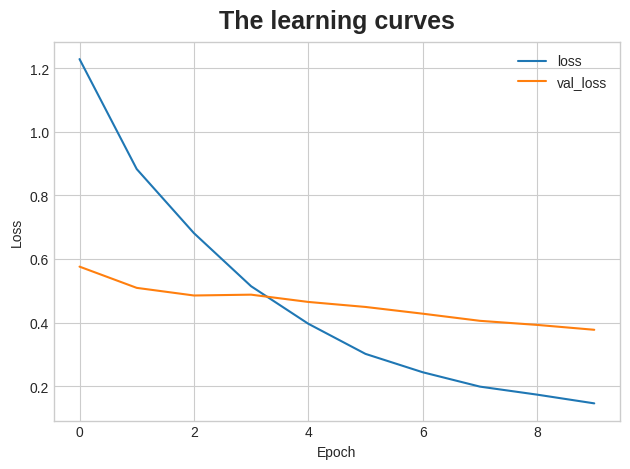

In [ ]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('The learning curves')

49/49 [==============================] - 1s 12ms/step
Classification Report
              precision    recall  f1-score   support

    Positivo       0.49      1.00      0.66       761
    Negativo       1.00      0.01      0.02       789

    accuracy                           0.50      1550
   macro avg       0.75      0.51      0.34      1550
weighted avg       0.75      0.50      0.33      1550

ROC Score: 0.5050697084917617
Accuracy Score: 0.49612903225806454
Average Precision Score: 0.5140103847254589
f1 Score: 0.020075282308657464
Confusion matrix, without normalization
[[761   0]
 [781   8]]


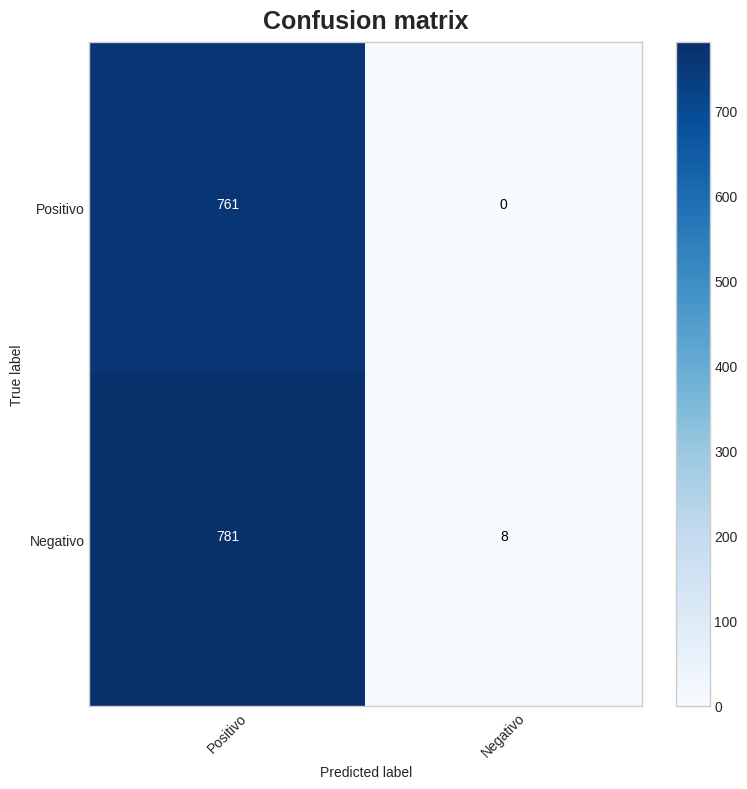

In [ ]:
y_pred= (model.predict(x_validation) > 0.5).astype("int32")

clf_matrix = confusion_matrix(y_validation, y_pred)
print('Classification Report')
print(classification_report(y_validation, y_pred, target_names=['Positivo', 'Negativo']))
print('ROC Score: {}'.format(roc_auc_score(y_validation,y_pred)))
print('Accuracy Score: {}'.format(accuracy_score(y_validation, y_pred)))
print('Average Precision Score: {}'.format(average_precision_score(y_validation, y_pred)))
print('f1 Score: {}'.format(f1_score(y_validation, y_pred)))
plot_confusion_matrix(clf_matrix, classes=['Positivo', 'Negativo'])
roc_keras = roc_auc_score(y_validation, y_pred)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True) 

In [ ]:
clf_gnb_roc = clf_gnb.predict(x_validation)
gnb_roc_auc = roc_auc_score(y_validation, clf_gnb_roc)

model_roc = model.predict(x_validation)  # keras
model_roc_auc = roc_auc_score(y_validation, model_roc)


fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_validation, clf_gnb_roc)
fpr_net, tpr_net_lr, thresholds_net_lr = roc_curve(y_validation, model_roc)

49/49 [==============================] - 1s 11ms/step


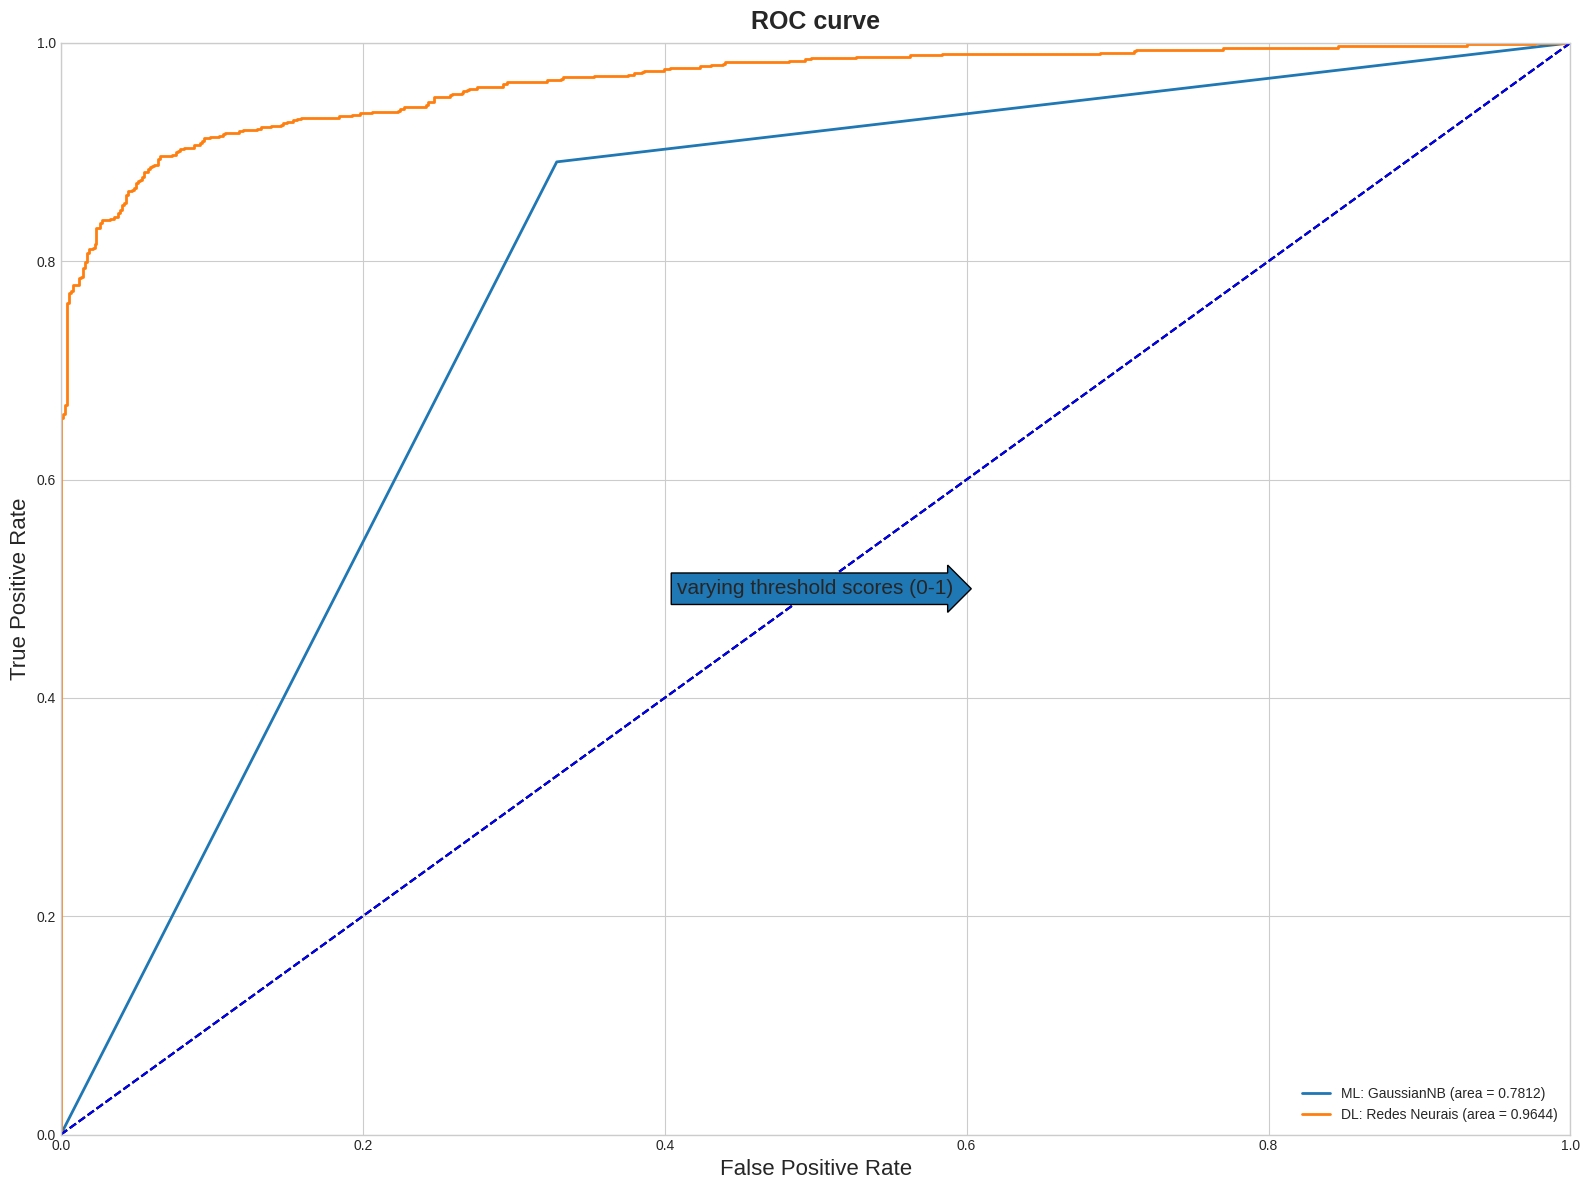

In [ ]:
plt.figure(figsize=(16, 12))                                    # Not shown
plot_roc_curve(fpr_lr, tpr_lr, label='ML: GaussianNB (area = %0.4f)' % gnb_roc_auc)
plot_roc_curve(fpr_net, tpr_net_lr, label='DL: Redes Neurais (area = %0.4f)' % model_roc_auc)
#plot_roc_curve(fpr_bnb, tpr_bnb, label='BernoulliNB')
#plot_roc_curve(fpr_gb, tpr_gb, label='Gradient Boosting')
plt.plot([0, 1], [0, 1],'b--') 
plt.text(0.5, 0.5, "varying threshold scores (0-1)", rotation=0, size=15,ha="center", va="center",bbox=dict(boxstyle="rarrow")) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC curve') 
plt.legend(loc="lower right") 
plt.savefig('ROC_curves') 
plt.show()

In [ ]:
#### File end HERE

# time of execution in minutes
time_exec_min = round( (time.time() - start_time)/60, 4)

print(f'time of execution (preprocessing): {time_exec_min} minutes')
print("the preprocessing is done.")
print("The next step is to do the feature engineering.")
print("All Done. :)")

time of execution (preprocessing): 4.9143 minutes
the preprocessing is done.
The next step is to do the feature engineering.
All Done. :)
